### Inferentials...  ANOVA and MANOVA

In [1]:
import seaborn as sns

In [14]:
#sns.get_dataset_names()

In [15]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
import pandas as pd
import numpy as np
#mod max row display count
pd.set_option('display.max_rows', 1000)

#### get means of numeric vars

In [16]:
penguins.mean(axis = 'index')

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

#### get descriptives

In [22]:
df = pd.DataFrame(penguins)
grouped_multiple = df.groupby(['sex']).agg({'body_mass_g': ['mean', 'min', 'max','std']})
grouped_multiple.columns = ['bm_mean', 'bm_min', 'bm_max','bm_stddev']
print(grouped_multiple)

            bm_mean  bm_min  bm_max   bm_stddev
sex                                            
Female  3862.272727  2700.0  5200.0  666.172050
Male    4545.684524  3250.0  6300.0  787.628884


#### Create a boxplot

<AxesSubplot:title={'center':'body_mass_g'}, xlabel='species'>

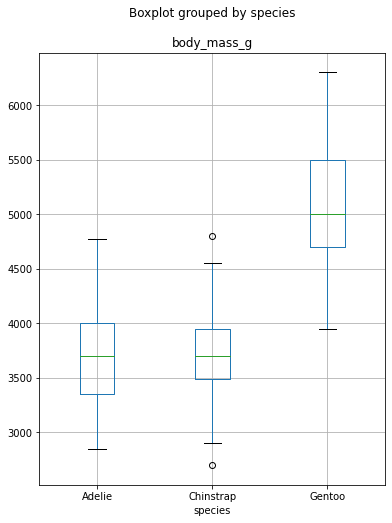

In [38]:
df.boxplot('body_mass_g', by='species', figsize=(6, 8))

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA

#### one-way ANOVA--significantly different bill structure by species?

In [37]:
df['bill'] = df.bill_length_mm + df.bill_depth_mm
#df.head()

model = ols('bill ~ species', data = df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table.round(5))

              sum_sq     df          F  PR(>F)
species   5182.60982    2.0  191.67282     0.0
Residual  4583.08270  339.0        NaN     NaN


#### MANOVA--significantly different bill structure and weight by species?

In [44]:
maov = MANOVA.from_formula('body_mass_g + bill ~ species', data=df)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0089 2.0000 338.0000 18864.3131 0.0000
         Pillai's trace   0.9911 2.0000 338.0000 18864.3131 0.0000
 Hotelling-Lawley trace 111.6232 2.0000 338.0000 18864.3131 0.0000
    Roy's greatest root 111.6232 2.0000 338.0000 18864.3131 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            species         Value  Num DF  Den DF  F Value  Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.1074 4.0000 676.0000 346.5717 0.0000
             Pil